测试NumPy库是否安装成功

In [1]:
import numpy as np
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [2]:
# 创建一个ndarray类的实例
a = np.array([1, 2, 3, 4])
print(a)
print('类型：', type(a))
print('维度：', a.ndim)
print('形状：', a.shape)
print('元素个数：', a.size)
print('数据形状：', a.dtype)
print('占据内存空间：%d 字节' % (a.nbytes))


[1 2 3 4]
类型： <class 'numpy.ndarray'>
维度： 1
形状： (4,)
元素个数： 4
数据形状： int32
占据内存空间：16 字节


创建为1维NumPy数组：

In [3]:
a = np.array([1,2,3])
print (a)


[1 2 3]


构造2维数组

In [4]:
a = np.array([[1, 2], [3, 4]])
print(a)


[[1 2]
 [3 4]]


创建复数数组

In [5]:
a = np.array([1, 2, 3], dtype = complex)
print(a)


[1.+0.j 2.+0.j 3.+0.j]


numpy.arange() 函数

In [6]:
x = np.arange(5)
print (x)


[0 1 2 3 4]


numpy.linspace()函数来创建等差数组

In [7]:
a, step= np.linspace(0, 19, 20, dtype='i', retstep=True)
print('step is: %d \n' % (step))
print('Array is:\n', a)

step is: 1 

Array is:
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [8]:
output = np.linspace(start=[2, 5, 9], stop=[100, 130, 160], num=10)
output

array([[  2.        ,   5.        ,   9.        ],
       [ 12.88888889,  18.88888889,  25.77777778],
       [ 23.77777778,  32.77777778,  42.55555556],
       [ 34.66666667,  46.66666667,  59.33333333],
       [ 45.55555556,  60.55555556,  76.11111111],
       [ 56.44444444,  74.44444444,  92.88888889],
       [ 67.33333333,  88.33333333, 109.66666667],
       [ 78.22222222, 102.22222222, 126.44444444],
       [ 89.11111111, 116.11111111, 143.22222222],
       [100.        , 130.        , 160.        ]])

In [9]:
output.shape

(10, 3)

通过将可选参数axis设置为1，可以返回该数组的转置版本

In [10]:
output = np.linspace(start=[2, 5, 9],
                     stop=[100, 130, 160],
                     num=10,
                     axis=1)
output

array([[  2.        ,  12.88888889,  23.77777778,  34.66666667,
         45.55555556,  56.44444444,  67.33333333,  78.22222222,
         89.11111111, 100.        ],
       [  5.        ,  18.88888889,  32.77777778,  46.66666667,
         60.55555556,  74.44444444,  88.33333333, 102.22222222,
        116.11111111, 130.        ],
       [  9.        ,  25.77777778,  42.55555556,  59.33333333,
         76.11111111,  92.88888889, 109.66666667, 126.44444444,
        143.22222222, 160.        ]])

In [11]:
output.shape

(3, 10)

numpy.logspace() 函数用于创建一个等比数列

In [12]:
np.logspace(0, 4, num=5, dtype='i', base=2)

array([ 1,  2,  4,  8, 16], dtype=int32)

特殊数组

In [13]:
az = np.zeros((3,4))                     # 3x4浮点型零数组
ao = np.ones((2,3,4), dtype=np.int16)    # 2x3x4 int16型1数组
ae = np.empty((2,3))                     # 2x3 浮点型空数组
print('这是一个０数组:\n', az)
print('\n这是一个１数组:\n', ao)
print('\n这是一个空数组:\n', ae)


这是一个０数组:
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

这是一个１数组:
 [[[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]

 [[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]]

这是一个空数组:
 [[0. 0. 0.]
 [0. 0. 0.]]


ndarray.reshape()方法

In [14]:
np.array([1, 9, -13, 20, 5, -6]).reshape(2, 3)

array([[  1,   9, -13],
       [ 20,   5,  -6]])

In [15]:
m1 = np.arange(12).reshape(3,4)
print('行等差数组\n', m1)
m2 = np.arange(12).reshape((3,4), order='F')
print('\n列等差数组\n', m2)
m3 = np.logspace(1, 12, num=12, base=2, dtype='i').reshape(3,4)
print('\n行等比数组\n', m3)
m4 = np.logspace(1, 12, num=12, base=2,
                 dtype='i').reshape((3,4), order='F')
print('\n列等比数组\n', m4)


行等差数组
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

列等差数组
 [[ 0  3  6  9]
 [ 1  4  7 10]
 [ 2  5  8 11]]

行等比数组
 [[   2    4    8   16]
 [  32   64  128  256]
 [ 512 1024 2048 4096]]

列等比数组
 [[   2   16  128 1024]
 [   4   32  256 2048]
 [   8   64  512 4096]]


In [16]:
np.identity(4, dtype='i')

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]], dtype=int32)

### 7.3.3	字节序
创建一个32位大端整数类型

In [17]:
dt = np.dtype('>i4')
print('类型名称：', dt.name)
print('字节序：', dt.byteorder)
print('数据大小：', dt.itemsize)
print(dt.type is np.int32)

类型名称： int32
字节序： >
数据大小： 4
True


In [18]:
np.dtype('i1').byteorder

'|'

### 7.3.4	结构化数据

In [19]:
dt = np.dtype([('name', np.unicode_, 16), ('grades', np.float64, (2,))])
print(dt['name'], dt['grades'])
x = np.array([('Sarah', (8.0, 7.0)), ('John', (6.0, 7.0))], dtype=dt)
print(x[0])
print(x[1])

<U16 ('<f8', (2,))
('Sarah', [8., 7.])
('John', [6., 7.])


## 7.4	操作数组

### 7.4.1	数组切片和索引

In [20]:
a = np.array([[1,2,3],[3,4,5],[4,5,6]])
print(a[1][2]) # 2维数组中第2行第3个元素
print(a[1, 2]) # 2维数组中第2行第3个元素
b = a[1]       # 数组第2行
print(a[1])
print(b[2])    # 第3个元素


5
5
[3 4 5]
5


#### 7.4.1.1	数组切片

In [21]:
a = np.arange(10) # [0 1 2 3 4 5 6 7 8 9]
b = a[2:7:2]      # 切片：从索引 2 开始到索引 7 停止，间隔为 2
c = a[2:]         # 切片：从索引 2 之后的元素
d = a[-2:10]      # 切片：从索引 8 之后的元素
s = slice(2,7,2)  # 创建切片对象
print(b)          # [2 4 6]
print(c)          # [2 3 4 5 6 7 8 9]
print(d)          # [8 9]
print(a[s])       # [2 4 6]
d[0] = 0          # 切片是对原数组的引用，a[8]将被修改
print(a)

[2 4 6]
[2 3 4 5 6 7 8 9]
[8 9]
[2 4 6]
[0 1 2 3 4 5 6 7 0 9]


In [22]:
a = np.arange(11, 36).reshape(5, 5)
print('切片： 从索引 1 开始的行\n', a[1:])
print('\n切片： 从索引 2 开始的行, 其中索引 0 3 的列\n', a[2:, :3:2])
print('\n切片： 隔2行2列\n', a[::2, ::2]) 

切片： 从索引 1 开始的行
 [[16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]
 [31 32 33 34 35]]

切片： 从索引 2 开始的行, 其中索引 0 3 的列
 [[21 23]
 [26 28]
 [31 33]]

切片： 隔2行2列
 [[11 13 15]
 [21 23 25]
 [31 33 35]]


In [23]:
a = np.array([[1,2,3],[3,4,5],[4,5,6]])
print('索引 输出每一行的第2列元素：\n', a[...,1])
print('切片 输出所有行第2列之后的所有元素：\n', a[...,1:])  

索引 输出每一行的第2列元素：
 [2 4 5]
切片 输出所有行第2列之后的所有元素：
 [[2 3]
 [4 5]
 [5 6]]


#### 7.4.1.2	花式索引

In [24]:
a = np.arange(0, 100, 10)
indices = [1, 5, -1]  # 索引号为1、5和最后一个元素
b = a[indices]
print(a) # [ 0 10 20 30 40 50 60 70 80 90]
print(b) # [10 50 90]

[ 0 10 20 30 40 50 60 70 80 90]
[10 50 90]


In [25]:
x = np.arange(32).reshape((8,4))
print(x[[4,2,-3,7]])  # 索引号为 4、2、-3、7的行

[[16 17 18 19]
 [ 8  9 10 11]
 [20 21 22 23]
 [28 29 30 31]]


In [26]:
x = np.arange(32).reshape((8,4))
print(x[[1,5,7,2],[0,3,1,2]])

[ 4 23 29 10]


In [27]:
x = np.arange(32).reshape((2,4,4))
print(x[[1,1],[0,1]])

[[16 17 18 19]
 [20 21 22 23]]


In [28]:
x = np.arange(32).reshape((8,4))
a = x[[1,5,7,2]][:,[0,3,1,2]]
a

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [29]:
x = np.arange(64).reshape((4,4,4))
print(x[[1,3]][:,[0,1]][:,:,[0,2]])

[[[16 18]
  [20 22]]

 [[48 50]
  [52 54]]]


In [30]:
print(x[np.ix_([1,3],[0,1],[0,2])])

[[[16 18]
  [20 22]]

 [[48 50]
  [52 54]]]


#### 7.4.1.3	布尔索引

In [31]:
a = np.arange(0, 100, 10)
idx = [True, False, True, False, True, False, True, False, True, False]
a[idx]    # 从索引0开始，包括0在内，选择所有偶数索引


array([ 0, 20, 40, 60, 80])

In [32]:
a = np.arange(0, 100, 10)
idx = a%20==0     # 产生bool数组，长度10
idx

array([ True, False,  True, False,  True, False,  True, False,  True,
       False])

In [33]:
a[idx] = 0
a

array([ 0, 10,  0, 30,  0, 50,  0, 70,  0, 90])

In [34]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]).reshape(3,4)
print('我们的数组是：\n', x)
print('大于 5 的元素是：\n', x[x >  5])

我们的数组是：
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
大于 5 的元素是：
 [ 6  7  8  9 10 11]


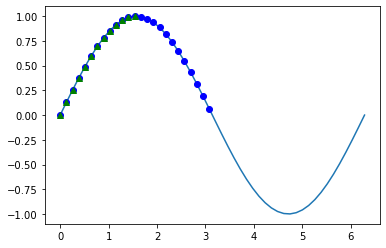

In [35]:
import matplotlib.pyplot as plt

# 绘制 0 ～ 2π 之间的正弦曲线
a = np.linspace(0, 2 * np.pi, 50)
b = np.sin(a)
plt.plot(a,b)

# 标识出正弦曲线在 0 ～ 2π 之间大于0的采样点
mask = b >= 0
plt.plot(a[mask], b[mask], 'bo')  # 蓝色点

# 标识出正弦曲线在 0 ～ π/2 之间大于0的采样点
mask = (b >= 0) & (a <= np.pi / 2)
plt.plot(a[mask], b[mask], 'g^')  # 绿三角
plt.show()

### 7.4.2	迭代数组
#### 7.4.2.1	基本迭代

In [36]:
a = np.arange(6).reshape(2,3)
print('迭代输出元素：')
for x in np.nditer(a):
    print(x, end=", " )

迭代输出元素：
0, 1, 2, 3, 4, 5, 

In [37]:
a = np.arange(6).reshape(2,3)
print('对a进行迭代的结果：')
for x in np.nditer(a):
    print(x, end=", " )
print('\n')
print('对a.T进行迭代的结果：')
for x in np.nditer(a.T):
    print(x, end=", " )

对a进行迭代的结果：
0, 1, 2, 3, 4, 5, 

对a.T进行迭代的结果：
0, 1, 2, 3, 4, 5, 

#### 7.4.2.2	控制迭代顺序

In [38]:
a = np.arange(0,60,5).reshape(3,4)

# “行优先”创建转置副本，并进行迭代
for x in np.nditer(a.T.copy(order='C')):
    print (x, end=", " )
print('\n')
# 强制列优先迭代a
for x in np.nditer(a, order='F'):
    print (x, end=", " )

print('\n')
# 强制行优先迭代，a的转置
for x in np.nditer(a.T, order='C'): 
    print(x, end=", " )


0, 20, 40, 5, 25, 45, 10, 30, 50, 15, 35, 55, 

0, 20, 40, 5, 25, 45, 10, 30, 50, 15, 35, 55, 

0, 20, 40, 5, 25, 45, 10, 30, 50, 15, 35, 55, 

#### 7.4.2.3	修改数组元素

In [39]:
a = np.arange(6).reshape(2,3)
print('初始数组\n', a)
with np.nditer(a, op_flags=['readwrite']) as it:
    for x in it:
        x[...] = 2 * x
print('修改后的数组\n', a)

初始数组
 [[0 1 2]
 [3 4 5]]
修改后的数组
 [[ 0  2  4]
 [ 6  8 10]]


#### 7.4.2.4	使用外部循环

In [40]:
for x in np.nditer(a, flags=['external_loop']):
    print(x, end=' ')
print('\n')
for x in np.nditer(a, flags=['external_loop'], order='F'):
    print(x, end=' ')
print('\n')
for x in np.nditer(a, flags=['external_loop'], order='C'):
    print(x, end=' ')

[ 0  2  4  6  8 10] 

[0 6] [2 8] [ 4 10] 

[ 0  2  4  6  8 10] 

#### 7.4.2.5	利用索引号迭代

In [41]:
a = np.arange(11, 38, 3).reshape(3, 3)
for idx in np.ndindex(a.shape):
    print(idx, a[idx])

(0, 0) 11
(0, 1) 14
(0, 2) 17
(1, 0) 20
(1, 1) 23
(1, 2) 26
(2, 0) 29
(2, 1) 32
(2, 2) 35


#### 7.4.2.6	条件迭代

In [42]:
a = np.arange(10)

# 将不小于5的元素乘10
np.where(a < 5, a, 10*a)

array([ 0,  1,  2,  3,  4, 50, 60, 70, 80, 90])

### 7.4.3	基本运算

In [43]:
a = np.arange(16).reshape((4, 4))

b = np.array([10, 62, 1, 14, 2, 56, 79, 2, 1, 45,
              4, 92, 35, 6, 53, 24]).reshape((4,4))

print('a + b\n', a + b)
print('a - b \n',a - b)
print('a * b\n', a * b)
print('a / b\n', a / b)
print('a^2\n', a ** 2)
print('a < b\n', a < b)
print('a > b\n', a > b)

a + b
 [[ 10  63   3  17]
 [  6  61  85   9]
 [  9  54  14 103]
 [ 47  19  67  39]]
a - b 
 [[-10 -61   1 -11]
 [  2 -51 -73   5]
 [  7 -36   6 -81]
 [-23   7 -39  -9]]
a * b
 [[   0   62    2   42]
 [   8  280  474   14]
 [   8  405   40 1012]
 [ 420   78  742  360]]
a / b
 [[0.         0.01612903 2.         0.21428571]
 [2.         0.08928571 0.07594937 3.5       ]
 [8.         0.2        2.5        0.11956522]
 [0.34285714 2.16666667 0.26415094 0.625     ]]
a^2
 [[  0   1   4   9]
 [ 16  25  36  49]
 [ 64  81 100 121]
 [144 169 196 225]]
a < b
 [[ True  True False  True]
 [False  True  True False]
 [False  True False  True]
 [ True False  True  True]]
a > b
 [[False False  True False]
 [ True False False  True]
 [ True False  True False]
 [False  True False False]]


### 7.4.4	位操作

In [44]:
a = np.arange(20).reshape([4,5])
print("a = \n", a)
b = (a % 3 == 0) | (a % 7 == 0)
print('检测结果：')
print(b)
print("a中能被3整除或者7整除的数字保留：")
print(a[b]) # 布尔索引

a = 
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
检测结果：
[[ True False False  True False]
 [False  True  True False  True]
 [False False  True False  True]
 [ True False False  True False]]
a中能被3整除或者7整除的数字保留：
[ 0  3  6  7  9 12 14 15 18]


### 7.4.5	布尔运算

In [45]:
a = np.arange(5)
b = np.arange(4,-1,-1)
print('a == b :', a == b)
print('not(a > b :', np.logical_not(a > b))
print('(a == b) or (a > b) :', np.logical_or(a == b, a > b))
print('(a == b) and (a > b) :', np.logical_and(a == b, a > b))

a == b : [False False  True False False]
not(a > b : [ True  True  True False False]
(a == b) or (a > b) : [False False  True  True  True]
(a == b) and (a > b) : [False False False False False]


### 7.4.6	NumPy广播（Broadcast）

In [46]:
a = np.array([1,2,3,4])
b = np.array([10,20,30,40])
a + b

array([11, 22, 33, 44])

In [47]:
a = np.array([[ 0, 0, 0], [10,10,10], [20,20,20], [30,30,30]])
b = np.array([1,2,3])
a + b

array([[ 1,  2,  3],
       [11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [48]:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # 创建与x大小相同的空数组

# 用显式循环将向量v加到矩阵x的每一行
for i in range(4):
    y[i] = x[i] + v
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


In [49]:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
vv = np.tile(v, (4, 1))  # 将v堆叠4次生成4x3的数组
x+vv

array([[ 2,  2,  4],
       [ 5,  5,  7],
       [ 8,  8, 10],
       [11, 11, 13]])

In [50]:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
x + v

array([[ 2,  2,  4],
       [ 5,  5,  7],
       [ 8,  8, 10],
       [11, 11, 13]])

### 7.4.7	数组排序

In [51]:
x = np.random.randint(20, size =10)
print("排序前 X = ", x)
a = np.sort(x)
print("排序后 X = ", x)
print("排序后 a = ", a)
x.sort()
print("修改数据源排序后 X = ", x)

排序前 X =  [13  0  7 17 14 18 11 15 14  6]
排序后 X =  [13  0  7 17 14 18 11 15 14  6]
排序后 a =  [ 0  6  7 11 13 14 14 15 17 18]
修改数据源排序后 X =  [ 0  6  7 11 13 14 14 15 17 18]


In [52]:
x = np.random.randint(20, size =10)
print("排序前 X = ", x)
print("排序后 X = ", np.sort(x))
print('排序后的索引 idx = ',  np.argsort(x))

排序前 X =  [18 13  4 15 12  8  6  6  5 17]
排序后 X =  [ 4  5  6  6  8 12 13 15 17 18]
排序后的索引 idx =  [2 8 6 7 5 4 1 3 9 0]


In [53]:
x = np.random.randint(100, size=10)
print("排序前 x=", x)

a = np.partition(x, 4)
print("分隔后 x=", a)

排序前 x= [91 98 18 24 93  5 54  9 42 73]
分隔后 x= [ 5  9 18 24 42 54 73 91 98 93]


In [54]:
x = np.random.randint(100, size=(4,5))
print("排序前 x = \n", x)

a = np.partition(x, 3, axis=1)
print("沿着行分隔后的数据是 \n", a)

排序前 x = 
 [[ 9 80 82 13 96]
 [ 0 12 96 57  3]
 [31 20  5  7 61]
 [31 63 83 45 89]]
沿着行分隔后的数据是 
 [[13  9 80 82 96]
 [ 0  3 12 57 96]
 [ 7  5 20 31 61]
 [45 31 63 83 89]]


### 7.4.8	统计运算

In [55]:
a = np.arange(1, 10) # [1, 2, 3, 4, 5, 6, 7, 8, 9]

print(a.sum())       # 45
print(a.prod())      # 362880
print(a.min())       # 1
print(a.argmin())    # 0
print(a.argmax())    # 9
print(a.max())       # 9
print(a.cumsum())    # [1  3  6 10 15 21 28 36 45]
print(a.cumprod())   # [1  2  6 24 120 720 5040 40320 362880] 

45
362880
1
0
8
9
[ 1  3  6 10 15 21 28 36 45]
[     1      2      6     24    120    720   5040  40320 362880]


In [56]:
a = np.random.randint(100, size=(4,5))
print("a = \n", a)

# 求最大值，每一行
b = a.max(axis=1)
print("a每一行的最大值是： ", b)

# 求每一列的和
c = a.sum(axis=0)
print("a每一列的和是：", c)

# 每一列积
c = a.prod(axis=0)
print("a每一列的积是：", c)

# 每一列累加
c = a.cumsum(axis = 0)
print("a每一列累加和是：\n", c)

a = 
 [[82 25  3 81 81]
 [77 30  8 74 45]
 [84 91 53 73 35]
 [45 41 99 51 33]]
a每一行的最大值是：  [82 77 91 99]
a每一列的和是： [288 187 163 279 194]
a每一列的积是： [23866920  2798250   125928 22315662  4209975]
a每一列累加和是：
 [[ 82  25   3  81  81]
 [159  55  11 155 126]
 [243 146  64 228 161]
 [288 187 163 279 194]]


## 7.5	用numpy处理代数问题
###  7.5.1	向量化计算

In [57]:
def H(x):
    return (0 if x < 0 else 1)

In [58]:
def Hv(x):
    return np.where(x < 0, 0, 1)

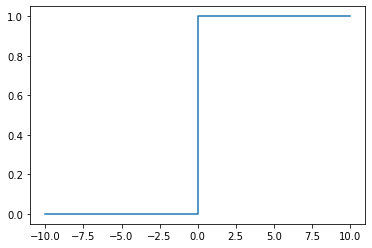

In [59]:
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 9)
plt.plot(x, Hv(x), drawstyle='steps-post')
plt.show()

In [60]:
x = np.linspace(-10, 10, 9)
hv = np.vectorize(H)
print(hv(x))

[0 0 0 0 1 1 1 1 1]


In [61]:
def Fv1(x):
    condition1 = x <= -1
    condition2 = np.logical_and(x > -1, x < 2)
    condition3 = x >= 2

    r = np.where(condition1, x + 2, 0.0)
    r = np.where(condition2, x**2, r)
    r = np.where(condition3, 2*x, r)
    return r

In [62]:
def Fv2(x):
    condition1 = x <= -1
    condition2 = np.logical_and(x > -1, x < 2)
    condition3 = x >= 2

    r = np.zeros(len(x))
    r[condition1] = x[condition1] + 2
    r[condition2] = x[condition2] ** 2
    r[condition3] = 2 * x[condition3]
    return r

In [63]:
class Wave():
    def __init__(self, amp, wl, v):
        self.__amp = amp
        self.__wl = wl
        self.__v = v

    def get_wave(self, x, t=0):
        wave = self.__amp * np.sin((2*np.pi/self.__wl)
                                      * (x - self.__v*t))
        return wave

    @staticmethod
    def plot_wave(x, ax, wave):
        ax.plot(x, wave)

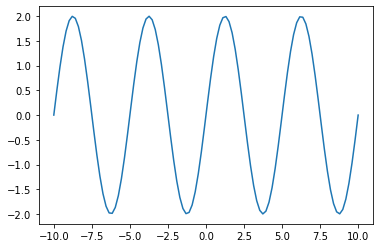

In [64]:
x = np.linspace(-10, 10, 100)
w1 = Wave(2, 5, 2)
fig = plt.figure()
w1.plot_wave(x, plt.gca(), w1.get_wave(x, 0))
plt.show()

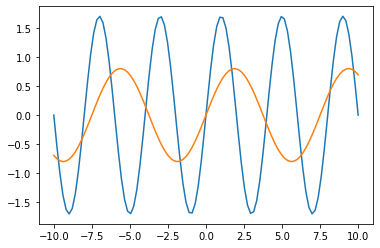

In [65]:
sampling = 100
x_range = -10, 10

amplitudes = [1.7, 0.8]
wavelengths = [4, 7.5]
velocities = [2, 1.5]

x = np.linspace(x_range[0], x_range[1], sampling)

w1 = Wave(amplitudes[0], wavelengths[0], velocities[0])
w2 = Wave(amplitudes[1], wavelengths[1], velocities[1])

fig = plt.figure()
w1.plot_wave(x, plt.gca(), w1.get_wave(x, 0))
w2.plot_wave(x, plt.gca(), w2.get_wave(x, 0))
plt.show()

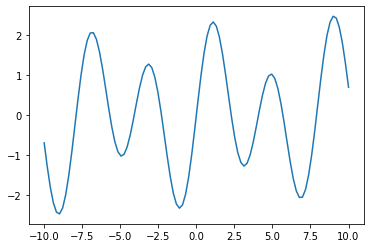

In [66]:
Wave.plot_wave(x, plt.gca(), w2.get_wave(x, 0)+w1.get_wave(x, 0))

In [67]:
%matplotlib auto

w1 = Wave(amplitudes[0], wavelengths[0], velocities[0])
w2 = Wave(amplitudes[1], wavelengths[1], velocities[1])

for time in np.arange(0, 40, 0.2):
    plt.clf()  # Clear last figure
    Wave.plot_wave(x, plt.gca(), 
                   w2.get_wave(x, time)+w1.get_wave(x, time))
    plt.ylim(-3, 3)  # Fix the limits on the y-axis
    plt.pause(0.1)  # Insert short pause to create animation


Using matplotlib backend: Qt5Agg


In [68]:
sampling = 50
R = 50 
x_ = R * np.linspace(-1, 1, sampling)
y_ = np.sqrt(R ** 2 - x_ ** 2)

In [69]:
x_return = x_[len(x_)-2:0:-1]
y_return = -np.sqrt(R ** 2 - x_return ** 2)

x_ = np.concatenate((x_, x_return))
y_ = np.concatenate((y_, y_return))

In [70]:
plt.scatter(x_, y_)
plt.axis("square")
plt.show()

In [71]:
x_ = R * np.cos(np.linspace(-np.pi, 0, sampling))
x_return = x_[len(x_)-2: 0: -1]

y_ = np.sqrt(R ** 2 - x_ ** 2)
y_return = -np.sqrt(R ** 2 - x_return ** 2)

x_ = np.concatenate((x_, x_return))
y_ = np.concatenate((y_, y_return))

plt.scatter(x_, y_)
plt.axis("square")
plt.show()

In [72]:
import matplotlib.animation
%matplotlib auto
sampling = 250

# ...

fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.set_axis_off()

images = []
for x_coord, y_coord in zip(x_, y_):
    img = ax.scatter(x_coord, y_coord, s=250, c="r")
    img2 = ax.scatter(0, 0, s=1000, c="y")
    images.append([img, img2])

animation = matplotlib.animation.ArtistAnimation(fig,
                                                 images,
                                                 interval=2.5,
                                                 blit=True
                                                 )
plt.show()

Using matplotlib backend: Qt5Agg


### 7.5.2	向量和矩阵
#### 7.5.2.1	加减法

In [73]:
a = np.array([1, 2])
b = np.array([3, 4])
a + b                # 求两向量和

array([4, 6])

In [74]:
m1 = np.array([[1, 2], [3, 4]])
m2 = np.array([[5, 6], [7, 8]])
m1 + m2              # 求两矩阵和

array([[ 6,  8],
       [10, 12]])

In [75]:
m1 - m2              # 求两矩阵差

array([[-4, -4],
       [-4, -4]])

#### 7.5.2.2	标量乘/除法

In [76]:
4*a

array([4, 8])

In [77]:
4*m1

array([[ 4,  8],
       [12, 16]])

#### 7.5.2.3	向量内积

In [78]:
a.dot(b)

11

In [79]:
b.dot(a)

11

In [80]:
np.dot(a, b)

11

#### 7.5.2.4	向量的外积

In [81]:
u = np.array([1, 2, 4])
v = np.array([-1, 3, -4])
print(np.cross(u, v))
print(np.cross(v, u))

[-20   0   5]
[20  0 -5]


#### 7.5.2.5	向量模

In [82]:
a = np.array([2, 3, 5])
print(np.sqrt(a.dot(a)))

6.164414002968976


#### 7.5.2.6	向量夹角

In [83]:
u = np.array([1, 2, 3])
v = np.array([1, 1, 1])
ctheata = u.dot(v)/ np.sqrt(v.dot(v) * u.dot(u))
np.arccos(ctheata) * 180 / np.pi


22.207654298596495

#### 7.5.2.7	矩阵乘法

In [84]:
m1 = np.array([1, 9, -13, 20, 5, -6]).reshape(2, 3)
m2 = np.arange(12).reshape((3,4))
m1.dot(m2)

array([[-68, -71, -74, -77],
       [-28,  -9,  10,  29]])

In [85]:
np.dot(m1, m2)

array([[-68, -71, -74, -77],
       [-28,  -9,  10,  29]])

In [86]:
np.dot(m2, m1)

ValueError: shapes (3,4) and (2,3) not aligned: 4 (dim 1) != 2 (dim 0)

In [87]:
m1 = np.array([1, 9, -13, 20, 5, -6]).reshape(2, 3)
m2 = np.arange(12).reshape((3,4))
m1 @ m2

array([[-68, -71, -74, -77],
       [-28,  -9,  10,  29]])

#### 7.5.2.8	转移矩阵

In [88]:
m1 = np.array([[1, 3],[2, 4]])
m2 = m1.transpose()
m3 = m1.T.copy(order='C')
m4 = np.transpose(m1)
print(m1)
print(m2)
print(m3)
print(m4)

[[1 3]
 [2 4]]
[[1 2]
 [3 4]]
[[1 2]
 [3 4]]
[[1 2]
 [3 4]]


#### 7.5.2.9	共轭转置矩阵

In [89]:
m = np.array([[1, 2], [3, 4]])
m = m - 1j*m
print('原矩阵\n', m)
mt = np.conjugate(np.transpose(m))
print('共轭转置\n', mt)
m @ mt

原矩阵
 [[1.-1.j 2.-2.j]
 [3.-3.j 4.-4.j]]
共轭转置
 [[1.+1.j 3.+3.j]
 [2.+2.j 4.+4.j]]


array([[10.+0.j, 22.+0.j],
       [22.+0.j, 50.+0.j]])

#### 7.5.2.10	范数

In [90]:
b = np.array([3, 4])
np.linalg.norm(b, ord=2)

5.0

#### 7.5.2.11	矩阵特征值

In [91]:
A = np.array([[3, -1], [-1, 3]])
w, v = np.linalg.eig(A)
print("特征值：", w)
print("特征向量：", v)

特征值： [4. 2.]
特征向量： [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


#### 7.5.2.12	矩阵的秩

In [92]:
A = np.random.randint(1, 10, (4, 4))
print(A)
# matrix_rank表示求矩阵的秩
print(np.linalg.matrix_rank(A))  # 4
# 将最后一行全部改成0
A[-1] = 0
print(np.linalg.matrix_rank(A))  # 3

[[8 6 1 7]
 [4 4 9 1]
 [5 6 2 4]
 [3 8 5 2]]
4
3


#### 7.5.2.13	逆矩阵

In [93]:
m = np.array([[1, 2], [3, 4]])
np.linalg.inv(m)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [94]:
A = np.random.randint(1, 10, (3, 2))

# 求逆矩阵使用inv，如果不是方阵，那么使用pinv
B = np.linalg.pinv(A)
print(B)
print((A @ B).round())

[[-0.68695652  0.06086957  0.52173913]
 [ 0.32173913  0.03478261 -0.13043478]]
[[ 1.  0. -0.]
 [ 0.  0.  0.]
 [-0.  0.  1.]]


#### 7.5.2.14	行列式

In [95]:
a = np.random.randint(1, 10, (8, 8))
print(a)
print(np.linalg.det(a).round())

[[7 2 5 7 9 1 8 7]
 [7 3 8 2 9 9 5 5]
 [2 9 8 8 2 4 5 4]
 [1 1 8 8 3 7 1 3]
 [1 3 8 7 8 3 6 9]
 [9 5 2 5 1 4 6 6]
 [2 7 7 3 3 1 8 5]
 [9 2 4 5 5 7 4 1]]
1009840.0


In [96]:
a = np.array([[5, 3], [2, 6]])
print(a)
print(np.linalg.det(a))

[[5 3]
 [2 6]]
23.999999999999993


In [97]:
determinant = np.random.randint(1, 10, (5, 5)) # （1） 行列式和它的转置行列式是相等
np.linalg.det(determinant).round(), np.linalg.det(determinant.T).round()

(-1155.0, -1155.0)

In [98]:
determinant = np.random.randint(1, 10, (5, 5))
determinant_1 = determinant.copy()

# 将第1行和第4行交换位置, 行列式会变号
determinant_1[[0, 3]] = determinant_1[[3, 0]]
print(np.linalg.det(determinant).round(),
      np.linalg.det(determinant_1).round())


1819.0 -1819.0


In [99]:
a = np.random.randint(1, 10, (5, 5))
a[2] = a[0] # 让第3行和第1行相同
print(np.linalg.det(a).round())  # 0.0

0.0


In [100]:
a = np.random.randint(1, 10, (4, 4))
b = a.copy()
c = a.copy()
b[3] = b[3] + 1
c[3] = b[3] + a[3] # 该行列式等于两个行列式之和
print(a)
print(b)
print(c)

print(np.linalg.det(a).round() + np.linalg.det(b).round())
print(np.linalg.det(c).round())

[[5 1 6 2]
 [8 6 4 1]
 [1 4 5 8]
 [5 9 6 8]]
[[ 5  1  6  2]
 [ 8  6  4  1]
 [ 1  4  5  8]
 [ 6 10  7  9]]
[[ 5  1  6  2]
 [ 8  6  4  1]
 [ 1  4  5  8]
 [11 19 13 17]]
-437.0
-437.0


In [101]:
print(np.linalg.det(a).round())
a[2] = a[1]+a[2]
print(a)
print(np.linalg.det(a).round())

-228.0
[[ 5  1  6  2]
 [ 8  6  4  1]
 [ 9 10  9  9]
 [ 5  9  6  8]]
-228.0


In [103]:
a = np.random.randint(1, 10, (5, 5))
a = a - np.tril(a,-1)
print(a)

# 行列式的值
print(np.linalg.det(a).round())

# 求对角线元素乘积
np.prod(np.diagonal(a)) 

[[3 4 7 1 8]
 [0 3 9 2 6]
 [0 0 4 7 3]
 [0 0 0 2 1]
 [0 0 0 0 3]]
216.0


216

### 7.5.3	用numpy求解线性方程组

#### 7.5.3.1	高斯消除法

In [104]:
def gauss_elimin(a, b):
    '''
    高斯消元法解线性方程组
    
    参数
    ___
    a: float numpy array
        系数参数矩阵
    b: float numpy array
        常数项矩阵
    
    返回值
    ______
    b: float numpy array
        解矩阵
    '''
    n = len(b)
    
    '''
    高斯消元
    λ = A[i,k] / A[k,k]
    A[i,j] ← A[i,j] − λA[k,j], j = k, k+1, ..., n
    b[i]   ← b[i] − λb[k]
    '''
    for k in range(0, n-1):
        for i in range(k+1, n):
            if a[i,k] != 0.0:
                lam = a[i,k]/a[k,k]
                a[i,k:n] = a[i,k:n] - lam*a[k,k:n]
                b[i] = b[i] - lam*b[k]
    '''
    反向替换 
    A[k,k]x[k] + A[k,k+1]x[k+1] +··· + A[k,n]x[n] = b[k]
    '''
    for k in range(n-1,-1,-1):
        b[k] = (b[k] - np.dot(a[k,k+1:n],b[k+1:n]))/a[k,k]
    return b

a = np.array([[4, -2, 1],
                 [-2, 4, -2],
                 [1, -2, 4]], dtype=float)
b = np.array([11, -16, 17], dtype=float)
c = gauss_elimin(a, b)
c

NameError: name 'gaussElimin' is not defined

In [105]:
a = np.array([[6., -4., 1.],
              [-4., 6., -4.],
              [1., -4., 6.]])
b = np.array([[-14., 22.],
              [36., -18.],
              [6., 7.]])
c = gauss_elimin(a, b)
c

array([[ 1.00000000e+01,  3.00000000e+00],
       [ 2.20000000e+01, -1.00000000e+00],
       [ 1.40000000e+01, -1.77635684e-16]])

#### 7.5.3.2	LU分解法

In [28]:
def vandermode(v):
    n = len(v)
    a = np.zeros((n,n))
    for j in range(n):
        a[:,j] = v**(n-j-1)
    return a

v = np.array([1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
b = np.array([0.0, 1.0, 0.0, 1.0, 0.0, 1.0])
a = vandermode(v)

In [29]:
a

array([[ 1.     ,  1.     ,  1.     ,  1.     ,  1.     ,  1.     ],
       [ 2.48832,  2.0736 ,  1.728  ,  1.44   ,  1.2    ,  1.     ],
       [ 5.37824,  3.8416 ,  2.744  ,  1.96   ,  1.4    ,  1.     ],
       [10.48576,  6.5536 ,  4.096  ,  2.56   ,  1.6    ,  1.     ],
       [18.89568, 10.4976 ,  5.832  ,  3.24   ,  1.8    ,  1.     ],
       [32.     , 16.     ,  8.     ,  4.     ,  2.     ,  1.     ]])

In [ ]:
def LUdecomp(a):
    '''
    Doolittle变换
    将系数矩阵A转换成[L\\U]的形式
    （1） 上三角矩阵U由高斯消元法产生。
    （2） 下三角矩阵L的非对角线元素为高斯消除过
          程中A矩阵中同一位置元素相对于主元的倍数。

    参数
    ___
    a: float numpy array
        系数参数矩阵

    返回值
    ______
    a: float numpy array
        L和U的混合矩阵[L\\U]
    '''
    n = len(a)

    for k in range(0, n-1):
        for i in range(k+1, n):
            if a[i,k] != 0.0:
                lam = a [i,k]/a[k,k]
                a[i,k+1:n] = a[i,k+1:n] - lam*a[k,k+1:n]
                a[i,k] = lam
    return a

def LUsolve(a, b):
    '''
    LU分解法解线性方程

    参数
    ___
    a: float numpy array
        经Doolittle变换过后的系数矩阵
    b: float numpy array
        常系数矩阵

    返回值
    ______
    b: float numpy array
        线性方程的解
    '''
    n = len(a)
    for k in range(1,n):
        b[k] = b[k] - np.dot(a[k,0:k],b[0:k])
    b[n-1] = b[n-1]/a[n-1,n-1]
    for k in range(n-2,-1,-1):
        b[k] = (b[k] - np.dot(a[k,k+1:n],b[k+1:n]))/a[k,k]
    return b

a = np.array([[6, -4, 1],
              [-4, 6, -4],
              [1, -4, 6]], dtype=float)
b = np.array([[-14, 22],
              [36, -18],
              [6, 7]], dtype=float)
a = LUdecomp(a)
LUsolve(a,b)


#### 7.5.3.3	对称带状系数矩阵

In [107]:
## module LUdecomp3
'''c,d,e = LUdecomp3(c,d,e).
   LU decomposition of tridiagonal matrix [c\d\e]. On output
   {c},{d} and {e} are the diagonals of the decomposed matrix.
   x = LUsolve(c,d,e,b).Solves [c\d\e]{x} = {b}, where {c}, {d} and {e} are the
   vectors returned from LUdecomp3.
'''

def LUdecomp3(c, d, e):
    '''
    针对3对角线矩阵的Doolittle变换
    
    参数
    ___
    c: float numpy vector
        下对角线元素组成的向量
    d: float numpy vector
        对角线元素组成的向量
    e: float numpy vector
        上对角线元素组成的向量
    
    返回值
    ______
    c: float numpy vector
        Doolittle变换后的下对角线元素
    d: float numpy vector
        Doolittle变换后的对角线元素
    e: float numpy vector
        Doolittle变换后的上对角线元素
    '''
    n = len(d)
    for k in range(1,n):
        lam = c[k-1]/d[k-1]
        d[k] = d[k] - lam*e[k-1]
        c[k-1] = lam
    return c,d,e

def LUsolve3(c, d, e, b):
    '''
    LU分解法解线性方程

    参数
    ___
    c: float numpy vector
        Doolittle变换后的下对角线元素
    d: float numpy vector
        Doolittle变换后的对角线元素
    e: float numpy vector
        Doolittle变换后的上对角线元素
    b: float numpy array
        常系数矩阵

    返回值
    ______
    b: float numpy array
        线性方程的解
    '''
    
    n = len(d)
    for k in range(1,n):
        b[k] = b[k] - c[k-1]*b[k-1]
    b[n-1] = b[n-1]/d[n-1]
    for k in range(n-2,-1,-1):
        b[k] = (b[k] - e[k]*b[k+1])/d[k]
    return b

In [109]:
d = np.ones((5))*2.0
c = np.ones((4))*(-1.0)
b = np.array([5.0, -5.0, 4.0, -5.0, 5.0])
e = c.copy()
c, d, e = LUdecomp3(c, d, e)
LUsolve3(c, d, e, b)

array([ 2., -1.,  1., -1.,  2.])

In [108]:
## module swap
''' swapRows(v,i,j).
    Swaps rows i and j of a vector or matrix [v].
    
    swapCols(v,i,j).
    Swaps columns of matrix [v].
'''
def swapRows(v, i, j):
    '''
    交换矩阵中的两行
    
    本函数可以扩展到多维，i、j分别
    为n维数组第1个维度上的两个索引
    
    参数
    ___
    v: numpy array
        矩阵
    i: int
        待交换行号
    j: int
        待交换行号

    返回值
    ______
        无
    
    '''
    if len(v.shape) == 1:
        v[i],v[j] = v[j],v[i]
    else:
        v[[i,j],:] = v[[j,i],:]
        
def swapCols(v,i,j):
    '''
    交换矩阵中的两列
    
    本函数可以扩展到多维，i、j分别
    为n维数组第1个维度上的两个索引
    
    参数
    ___
    v: numpy array
        矩阵
    i: int
        待交换行号
    j: int
        待交换行号

    返回值
    ______
        无
    
    '''    
    v[:,[i,j]] = v[:,[j,i]]

In [47]:
## module gaussPivot
'''x = gaussPivot(a,b,tol=1.0e-12).
   Solves [a]{x} = {b} by Gauss elimination with
   scaled row pivoting
'''

import numpy as np

def gaussPivot(a, b, tol=1.0e-12):
    '''
    增加了枢轴元素选取的高斯消元法
    解线性方程组
    
    参数
    ___
    a: float numpy array
        系数参数矩阵
    b: float numpy array
        常数项矩阵
    tol： float
        用来判断矩阵是否存在奇异值
    
    返回值
    ______
    b: float numpy array
        解矩阵
    '''
    n = len(b)
    
    # 缩放比
    s = np.zeros(n)
    for i in range(n):
        s[i] = max(np.abs(a[i,:]))
        
    for k in range(0,n-1):        
        p = np.argmax(np.abs(a[k:n,k])/s[k:n]) + k
        if abs(a[p,k]) < tol: err('奇异矩阵')
        
        if p != k:           # 行交换
            swapRows(b,k,p)
            swapRows(s,k,p)
            swapRows(a,k,p)
            
        # 消元
        for i in range(k+1,n):
            if a[i,k] != 0.0:
                lam = a[i,k]/a[k,k]
                a[i,k+1:n] = a[i,k+1:n] - lam*a[k,k+1:n]
                b[i] = b[i] - lam*b[k]
                
    if abs(a[n-1,n-1]) < tol: err('奇异矩阵')
        
    # 后向替换
    b[n-1] = b[n-1]/a[n-1,n-1]
    for k in range(n-2,-1,-1):
        b[k] = (b[k] - np.dot(a[k,k+1:n],b[k+1:n]))/a[k,k]
    
    return (b)

In [23]:
a = np.array([[2, -3, -1],
              [3, 2, -5],
              [2, 4, -1]], dtype=float)
b = np.array([3, -9, -5], dtype=float)
gaussPivot(a, b)

array([ 0.65306122, -1.14285714,  1.73469388])

In [19]:
a = np.array([[6, -4, 1],
                 [-4, 6, -4],
                 [1, -4, 6]], dtype=float)
b = np.array([[-14, 22],
                 [36, -18],
                 [6, 7]], dtype=float)
gaussPivot(a, b)

array([[ 1.00000000e+01,  3.00000000e+00],
       [ 2.20000000e+01, -1.00000000e+00],
       [ 1.40000000e+01, -1.77635684e-16]])

In [26]:
## module LUpivot
'''a,seq = LUdecomp(a,tol=1.0e-9).
   LU decomposition of matrix [a] using scaled row pivoting.
   The returned matrix [a] = contains [U] in the upper
   triangle and the nondiagonal terms of [L] in the lower triangle.
   Note that [L][U] is a row-wise permutation of the original [a];
   the permutations are recorded in the vector {seq}.
   
   x = LUsolve(a,b,seq).
   Solves [L][U]{x} = {b}, where the matrix [a] = and the
   permutation vector {seq} are returned from LUdecomp.
'''

import numpy as np
import error

def LUdecomp(a,tol=1.0e-9):
    '''
    增加了枢轴元素选取的Doolittle变换
    将系数矩阵A转换成[L\\U]的形式
    （1） 上三角矩阵U由高斯消元法产生。
    （2） 下三角矩阵L的非对角线元素为高斯消除过
          程中A矩阵中同一位置元素相对于主元的倍数。

    参数
    ___
    a: float numpy array
        系数参数矩阵        
    tol： float
        用来判断矩阵是否存在奇异值
    
    返回值
    ______
    a: float numpy array
        L和U的混合矩阵[L\\U]
    seq: int array
        原矩阵中每一行在新矩阵中的排列
    '''
    n = len(a)
    seq = np.array(range(n))
    
    # 缩放系数
    s = np.zeros((n))
    for i in range(n):
        s[i] = max(abs(a[i,:]))
        
    for k in range(0,n-1):
        # 判断是否需要行变换
        p = np.argmax(np.abs(a[k:n,k])/s[k:n]) + k
        if abs(a[p,k]) <  tol: error.err('奇异矩阵')
        if p != k:
            swapRows(s,k,p)
            swapRows(a,k,p)
            swapRows(seq,k,p)
        
        # 消元
        for i in range(k+1,n):
            if a[i,k] != 0.0:
                lam = a[i,k]/a[k,k]
                a[i,k+1:n] = a[i,k+1:n] - lam*a[k,k+1:n]
                a[i,k] = lam
    return a, seq

def LUsolve(a, b, seq):
    '''
    LU分解法解线性方程

    参数
    ___
    a: float numpy array
        经Doolittle变换过后的系数矩阵
    b: float numpy array
        常系数向量
    seq：int array
        原始系数矩阵每一行新的排列

    返回值
    ______
    b: float numpy array
        线性方程的解
    '''
    n = len(a)
    
    # 重新排列常系数向量
    x = b.copy()
    for i in range(n):
        x[i] = b[seq[i]]
        
    # 求解
    for k in range(1,n):
        x[k] = x[k] - np.dot(a[k,0:k],x[0:k])
    x[n-1] = x[n-1]/a[n-1,n-1]
    for k in range(n-2,-1,-1):
        x[k] = (x[k] - np.dot(a[k,k+1:n],x[k+1:n]))/a[k,k]
    return x

ModuleNotFoundError: No module named 'error'

In [30]:
## module LUdecomp3
''' c,d,e = LUdecomp3(c,d,e).
    LU decomposition of tridiagonal matrix [c\d\e]. On output
    {c},{d} and {e} are the diagonals of the decomposed matrix
    x = LUsolve(c,d,e,b).
    Solves [c\d\e]{x} = {b}, where {c}, {d} and {e} are the
    vectors returned from LUdecomp3.
'''
def LUdecomp3(c,d,e):
    n = len(d)
    for k in range(1,n):
        lam = c[k-1]/d[k-1]
        d[k] = d[k] - lam*e[k-1]
        c[k-1] = lam
    return c,d,e

def LUsolve3(c,d,e,b):
    n = len(d)
    for k in range(1,n):
        b[k] = b[k] - c[k-1]*b[k-1]
    b[n-1] = b[n-1]/d[n-1]
    for k in range(n-2,-1,-1):
        b[k] = (b[k] - e[k]*b[k+1])/d[k]
    return b

In [ ]:
## module LUdecomp5
''' d,e,f = LUdecomp5(d,e,f).
    LU decomposition of symmetric pentadiagonal matrix [a], where
    {f}, {e} and {d} are the diagonals of [a]. On output
    {d},{e} and {f} are the diagonals of the decomposed matrix.
    
    x = LUsolve5(d,e,f,b).
    Solves [a]{x} = {b}, where {d}, {e} and {f} are the vectors
    returned from LUdecomp5.
'''
def LUdecomp5(d,e,f):
    n = len(d)
    for k in range(n-2):
        lam = e[k]/d[k]
        d[k+1] = d[k+1] - lam*e[k]
        e[k+1] = e[k+1] - lam*f[k]
        e[k] = lam
        lam = f[k]/d[k]
        d[k+2] = d[k+2] - lam*f[k]
        f[k] = lam
    lam = e[n-2]/d[n-2]
    d[n-1] = d[n-1] - lam*e[n-2]
    e[n-2] = lam
    return d,e,f

def LUsolve5(d,e,f,b):
    n = len(d)
    b[1] = b[1] - e[0]*b[0]
    for k in range(2,n):
        b[k] = b[k] - e[k-1]*b[k-1] - f[k-2]*b[k-2]
    b[n-1] = b[n-1]/d[n-1]
    b[n-2] = b[n-2]/d[n-2] - e[n-2]*b[n-1]
    for k in range(n-3,-1,-1):
        b[k] = b[k]/d[k] - e[k]*b[k+1] - f[k]*b[k+2]
    return b

In [24]:
def matInv(a):
    '''
    求矩阵a的逆
    
    参数
    ____
    a: numpy array
        n阶矩阵
    
    返回值
    ______
    aInv：
        矩阵a的逆
    '''
    n = len(a[0])
    aInv = np.identity(n)
    a, seq = LUdecomp(a)
    for i in range(n):
        aInv[:, i] = LUsolve(a, aInv[:,i], seq)
    return aInv


In [25]:
a = np.array([[ 0.6, -0.4,  1.0],\
              [-0.3,  0.2,  0.5],\
              [ 0.6, -1.0,  0.5]])
aOrig = a.copy()  # Save original [a]
aInv = matInv(a)  # Invert [a] (original [a] is destroyed)
print("\naInv =\n",aInv)
print("\nCheck: a*aInv =\n", np.dot(aOrig, aInv))

<ipython-input-7-ef58421aacb1>:33: RuntimeWarning: divide by zero encountered in double_scalars
  lam = a [i,k]/a[k,k]


ValueError: too many values to unpack (expected 2)

In [12]:
import numpy as np

def gauss_seidel(a, b, x0, iters=1000):
    '''
    Gauss_Seidel 迭代
    
    参数
    ____
    a: float Matrix
        系数矩阵
    b: float vector
        常数向量
    x0：float vector
        解的初始值
    iters: int
        迭代次数，默认1000次
        
    返回值
    ______
    x：float vector
        解向量
    '''
    
    m, n = a.shape
    x = x0
    if m != n:
        raise ValueError("输入必须是方阵！")
    
    for k in range(iters):
        # 进行迭代
        x_i_old = x.copy()
        for i in range(n):
            sum_new = (a[i, : i] * x[: i]).sum()
            sum_old = (a[i, i + 1 :] * x[i + 1 :]).sum()
            x[i] = 1 / a[i, i] * (b[i] - sum_new - sum_old)

        # 计算偏差值
        tol = np.sqrt(np.dot(x-x_i_old,x-x_i_old))    
        if tol / n < 1e-8:
            break
        print("迭代 {0}: x = {1}, tol = {2}".format(k, x, tol))
        
    return x

ITERATION_LIMIT = 1000

# initialize the matrix
A = np.array([[10., -1., 2., 0.],
              [-1., 11., -1., 3.],
              [2., -1., 10., -1.],
              [0., 3., -1., 8.]])
# initialize the RHS vector
b = np.array([6., 25., -11., 15.])

print("System of equations:")
for i in range(A.shape[0]):
    row = ["{0:3g}*x{1}".format(A[i, j], j + 1) for j in range(A.shape[1])]
    print("[{0}] = [{1:3g}]".format(" + ".join(row), b[i]))

x = np.zeros_like(b)

x = gauss_seidel(A, b, x0=x, iters=ITERATION_LIMIT)

print("Solution: {0}".format(x))
error = np.dot(A, x) - b
print("Error: {0}".format(error))

System of equations:
[ 10*x1 +  -1*x2 +   2*x3 +   0*x4] = [  6]
[ -1*x1 +  11*x2 +  -1*x3 +   3*x4] = [ 25]
[  2*x1 +  -1*x2 +  10*x3 +  -1*x4] = [-11]
[  0*x1 +   3*x2 +  -1*x3 +   8*x4] = [ 15]
迭代 0: x = [ 0.6         2.32727273 -0.98727273  0.87886364], tol = 2.742864757228523
迭代 1: x = [ 1.03018182  2.03693802 -1.0144562   0.98434122], tol = 0.5302971831879818
迭代 2: x = [ 1.00658504  2.00355502 -1.00252738  0.99835095], tol = 0.044830810568892446
迭代 3: x = [ 1.00086098  2.00029825 -1.00030728  0.99984975], tol = 0.007109620693563937
迭代 4: x = [ 1.00009128  2.00002134 -1.00003115  0.9999881 ], tol = 0.0008743589512860802
迭代 5: x = [ 1.00000836  2.00000117 -1.00000275  0.99999922], tol = 9.062087893700401e-05
迭代 6: x = [ 1.00000067  2.00000002 -1.00000021  0.99999996], tol = 8.219392164848766e-06
迭代 7: x = [ 1.00000004  1.99999999 -1.00000001  1.        ], tol = 6.539341071620232e-07
迭代 8: x = [ 1.  2. -1.  1.], tol = 4.423370190603661e-08
Solution: [ 1.  2. -1.  1.]
Error: [ 5.5765

In [14]:
## module newtonPoly
'''p = evalPoly(a,xData,x).
   Evaluates Newton’s polynomial p at x. The coefficient
   vector {a} can be computed by the function ’coeffts’.
   
   a = coeffts(xData,yData).
   Computes the coefficients of Newton’s polynomial.
'''
def eval_newtonpoly(a, xs, x):
    '''
    评估牛顿多项式在某一点的值
    
    参数
    ____
    a: vector
        牛顿多项式的系数向量
    xs: vector
        已知数据集中的x值
    x: float
        x值
        
    返回值
    ______
    p: float
        牛顿多项式的值p(x)
    '''
    n = len(xs) - 1  # Degree of polynomial
    p = a[n]
    for k in range(1,n+1):
        p = a[n-k] + (x -xs[n-k])*p
    return p

def newton_coeffts(xs, ys):
    '''
    根据数据集，递推牛顿多项式的系数
    
    参数
    ____
    xs: float vector
        数据集中的x值
    ys: float vector
        数据集中的y值

    返回值
    ______
    a: float vector
        牛顿多项式的系数向量
    '''
    m = len(xs) 
    a = ys.copy()
    for k in range(1,m):
        a[k:m] = (a[k:m] - a[k-1])/(xs[k:m] - xs[k-1])
    return a

In [15]:
import matplotlib.pyplot as plt

x = np.arange(-4, 4.1, 0.1)
y = eval_newtonpoly(a, xs, x)
plt.plot(x, y, c='k')
plt.scatter(xs, ys)
plt.show()

In [3]:
#coding=gbk
import numpy as np
'''
Created on 2014-8-31

@author: Administrator
'''

def Neville(xt,m,n,x):
    for i in range(1,n):
        for j in range(1,n):
            w[i-j][i]=(x-xt[i-j])/(xt[i]-xt[i-j])
            m[i][j]=m[i-1][j-1]+w[i-j][i]*(m[i][j-1]-m[i-1][j-1])
    for i in range(n):
        for j in range(0,i+1):
            if j%n==0:
                print("\n")
            #print(' %f' %m[i][j])
    return 

n = int(input('插入节点个数:'))
x = float(input('输入x的值:'))
m = [[0 for i in range(n)] for j in range(n)]    #创建n*n矩阵
w = [[0 for i in range(n)] for j in range(n)]
xt = [0]*n
for i in range(n):
    m[i][0] = float(input('插入第%d个y值：' %(i+1)))
for i in range(n):
    xt[i] = float(input('插入第%d个x值：' %(i+1)))
Neville(xt,m,n,x)

插入节点个数:4
输入x的值:3
插入第1个y值：3
插入第2个y值：-15
插入第3个y值：-4
插入第4个y值：15
插入第1个x值：-2
插入第2个x值：-1
插入第3个x值：4
插入第4个x值：5


 3.000000


 -15.000000
 -87.000000


 -4.000000
 -6.200000
 -19.666667


 15.000000
 -23.000000
 -17.400000
 -18.047619


In [8]:
def neville(xs, ys, x):
    '''
    内维尔插值
    
    参数
    ____
    xs: float vector
        数据点集中的x值
    ys: float vector
        数据点集中的y值
    x: float
        插值点的x值
    
    返回值    
    ______
    y: float
        插值点的y值
    '''
    m = len(xs)
    y = ys.copy()
    for k in range(1,m):
        y[0:m-k] = ((x - xs[k:m])*y[0:m-k] +      \
                    (xs[0:m-k] - x)*y[1:m-k+1])/  \
                   (xs[0:m-k] - xs[k:m])
    return y[0]

x = 3
xd = np.array([-2, -1, 4, 5])
yd = np.array([3, -15, -4, 15])

neville(xd, yd, x)

-17

In [14]:
def lagrange(xs, ys, x):
    '''
    计算拉格朗日插值
    
    参数
    ____
    x: float
        插值点
    xs: float vector
        数据集的x值
    ys: float vector
        数据集的y值
        
    返回值
    ______
    y: float
        插值
    '''
    y = 0
    n = len(xt)
    for i in range(n):
        t = 1
        for j in range(n):
            if i!=j:
                t = t*(x - xs[j])/(xs[i] - xs[j])
        y = y+t*yt[i]
    return y    

lagrange(xs, ys, x)

NameError: name 'xs' is not defined

In [20]:
def rational(xs, ys,x):
    '''
    有理函数插值
    
    参数
    ____
    xs: float vector
        数据集的x值
    ys: float vector
        数据集的y值
    x: float
        插值点的x值
    
    返回值
    ______
    y: float
        插值点的y值
    '''
    m = len(xs)
    r = ys.copy()
    rOld = np.zeros(m)
    
    for k in range(m-1):
        for i in range(m-k-1):
            if abs(x - xs[i+k+1]) < 1.0e-9:
                return ys[i+k+1]
            else:
                c1 = r[i+1] - r[i]
                c2 = r[i+1] - rOld[i+1]
                c3 = (x - xs[i])/(x - xs[i+k+1])
                r[i] = r[i+1] + c1/(c3*(1.0 - c1/c2) - 1.0)
                rOld[i+1] = r[i+1]
    return r[0]

In [22]:
xs = np.array([-2, 1, 4, -1, 3, -4], dtype=float)
ys = np.array([-1, 2, 59, 4, 24, -53], dtype=float)

x = np.arange(-4, 4.1, 0.01)
y = np.zeros_like(x)
for i in range(len(y)):
    y[i] = rational(xs, ys, x[i])
plt.plot(x, y, c='k')
plt.scatter(xs, ys)
plt.show()

NameError: name 'plt' is not defined

In [44]:
def curvatures(xs, ys):
    '''
    求三次样条函数在每个数据点上的二阶导数
    
    参数
    ____
    xs: float vector
        数据集的x值
    ysL float vector
        数据集的y值
    
    返回值
    k: float vector
        三次样条函数在每个数据点上的二阶导数
    ______
    '''
    n = len(xs) - 1
    c = np.zeros(n)
    d = np.ones(n+1)
    e = np.zeros(n)
    k = np.zeros(n+1)
    
    # 构建系数项和常数项
    c[0:n-1] = xs[0:n-1] - xs[1:n]
    d[1:n] = 2.0*(xs[0:n-1] - xs[2:n+1])
    e[1:n] = xs[1:n] - xs[2:n+1]
    k[1:n] = 6.0*(ys[0:n-1] - ys[1:n])    \
             /(xs[0:n-1] - xs[1:n])       \
             - 6.0*(ys[1:n] - ys[2:n+1])  \
             /(xs[1:n] - xs[2:n+1])
    
    # 解线性方程组
    LUdecomp3(c, d, e)
    LUsolve3(c, d, e, k)
    return k

def evalSpline(xs, ys, k, x):
    '''
    三次样条插值
    
    参数
    ____
    xs: float vector
        数据集的x值
    ys: float vector
        数据集的y值
    k: float vector
        三次样条函数在每个数据点上的二阶导数
    x: float
        插值点的x值
    
    返回值
    ______
    y: float
        插值点的y值
    '''
    def findSegment(xs, x):
        '''
        查找插值点的区间
        '''
        iLeft = 0
        iRight = len(xs)- 1
        
        while 1:
            if (iRight-iLeft) <= 1: 
                return iLeft
            i = (iLeft + iRight) // 2
            if x < xs[i]:
                iRight = i
            else:
                iLeft = i
    
    i = findSegment(xs, x)
    h = xs[i] - xs[i+1]
    y = ((x - xs[i+1])**3/h - (x - xs[i+1])*h)*k[i]/6.0 \
        - ((x - xs[i])**3/h - (x - xs[i])*h)*k[i+1]/6.0 \
        + (ys[i]*(x - xs[i+1])                           \
        - ys[i+1]*(x - xs[i]))/h
    return y

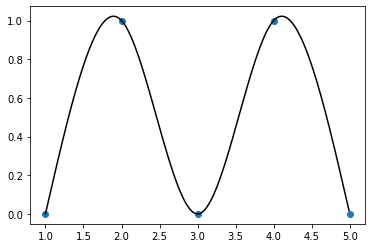

In [45]:
import matplotlib.pyplot as plt

xs = np.array([1., 2, 3, 4, 5], dtype=float)
ys = np.array([0, 1, 0, 1, 0], dtype=float)
k = curvatures(xs, ys)
x = np.arange(1, 5., 0.01)
y = np.zeros_like(x)
for i in range(len(y)):
    y[i] = evalSpline(xs, ys, k, x[i])
plt.plot(x, y, c='k')
plt.scatter(xs, ys)
plt.show()

In [147]:
import math

def poly_fit(xs, ys, m):
    '''
    使用最小二乘法进行多项式拟合
    
    首先生成矩阵方程 Aa=b的系数矩阵A
    和常数向量b，然后使用带枢轴交换
    的高斯方法解线性方程组。
    
    参数
    ____
    xs: float vector
        数据集中的x值
    ys: float vector
        数据集中的y值
    m: int
        多项式的最高阶数
    
    返回值
    ______
    a: float vector
        多项式系数
    '''
    a = np.zeros((m+1,m+1))
    b = np.zeros(m+1)
    s = np.zeros(2*m+1)
    
    # 生成系数矩阵和常数向量
    for i in range(len(xs)):
        temp = ys[i]
        for j in range(m+1):
            b[j] = b[j] + temp
            temp = temp*xs[i]
        temp = 1.0
        for j in range(2*m+1):
            s[j] = s[j] + temp
            temp = temp*xs[i]
    for i in range(m+1):
        for j in range(m+1):
            a[i,j] = s[i+j]
            
    return gaussPivot(a, b) # 求解线性方程组

def std_dev(c, xs, ys):
    '''
    计算残差，评估拟合度
    
    参数
    ____
    c: float vector
        拟合函数的系数向量
    xs: float vector
        数据集中的x值
    ys: float vector
        数据集中的y值
    
    返回值
    ______
    sigma: float
        残差平方和的平方根
    '''
    def eval_poly(c, x):
        '''
        根据拟合函数评估某一点的值
        '''
        m = len(c) - 1
        p = c[m]
        for j in range(m):
            p = p*x + c[m-j-1]
    return p
    
    n = len(xs) - 1
    m = len(c) - 1
    sigma = 0.0
    
    for i in range(n+1):
        p = eval_poly(c, xs[i])
        sigma = sigma + (ys[i] - p)**2
    sigma = math.sqrt(sigma/(n - m))
    return sigma

def plot_poly(xs, ys, c):
    '''
    根据系数绘制拟合曲线
    
    参数
    ____
    xs: float vector
        数据集中的x值
    ys: float vector
        数据集中的y值
    c: float vector
        拟合函数的系数向量
    
    返回值
    ______
        无
    '''
    m = len(c)
    x1 = min(xs)
    x2 = max(xs)
    dx = (x2 - x1)/20.0
    x = np.arange(x1,x2 + dx/10.0,dx)
    y = np.zeros((len(x)))*1.0
    for i in range(m):
        y = y + c[i]*x**i
    plt.plot(xs, ys, 'o', label='Original data')
    plt.plot(x, y, 'k-', label='Fitted line')
    plt.grid(True)
    plt.legend()
    plt.show()

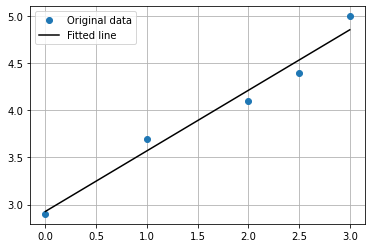

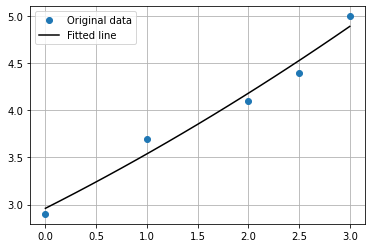

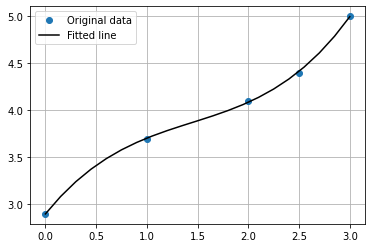

In [148]:
xs = np.array([0.,1.0,2.,2.5,3.])
ys=np.array([2.9,3.7,4.1,4.4,5.])
c1 = poly_fit(xs, ys, 1)
c2 = poly_fit(xs, ys, 2)
c3 = poly_fit(xs, ys, 3)
plot_poly(xs, ys, c1)
plot_poly(xs, ys, c2)
plot_poly(xs, ys, c3)

In [131]:
c1

array([2.92672414, 0.64310345])

In [135]:
x

array([0.64310345, 2.92672414])

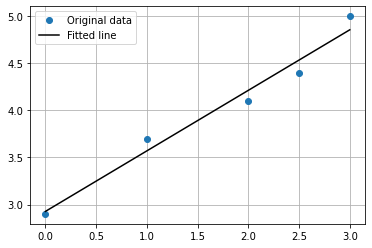

In [151]:
import numpy as np

A =  np.vstack([xs, np.ones(len(xs))]).T
a1, a0 = np.linalg.lstsq(A,ys,rcond=None)[0]
plt.grid(True)
plt.plot(xs, ys, 'o', label='Original data')
plt.plot(xs, a1*xs + a0, 'k', label='Fitted line')
plt.legend()
plt.show()

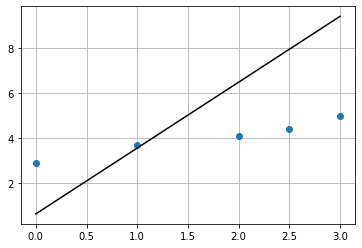

In [137]:
plot_poly(xs, ys, x)

In [128]:
ys

array([2.9, 3.7, 4.1, 4.4, 5. ])

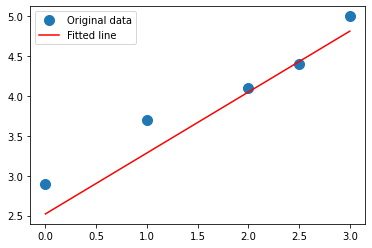

In [107]:
_ = plt.plot(xs, ys, 'o', label='Original data', markersize=10)

_ = plt.plot(xs, x*xs + residuals, 'r', label='Fitted line')

_ = plt.legend()

plt.show()

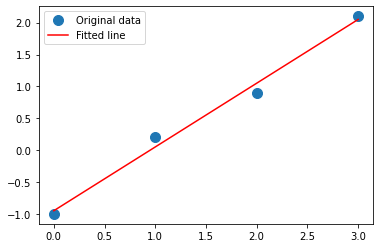

In [108]:
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
_ = plt.plot(x, y, 'o', label='Original data', markersize=10)
_ = plt.plot(x, m*x + c, 'r', label='Fitted line')
_ = plt.legend()
plt.show()

In [110]:
A = np.array([[1, 2, 1],
              [1,1,2],
              [2,1,1],
              [1,1,1]])
b = np.array([[4,3,5,4],[1,2,3,4]]).T # transpose to align dimensions
x, residuals, rank, s = np.linalg.lstsq(A,b, rcond=None)

In [111]:
x

array([[ 2.05263158,  1.63157895],
       [ 1.05263158, -0.36842105],
       [ 0.05263158,  0.63157895]])

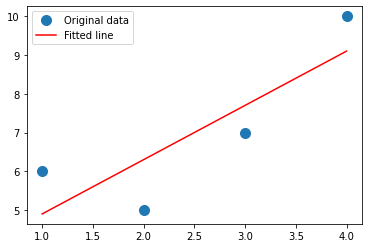

In [112]:
x = np.array([1., 2., 3., 4.])
y = np.array([6., 5., 7., 10.])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
_ = plt.plot(x, y, 'o', label='Original data', markersize=10)
_ = plt.plot(x, m*x + c, 'r', label='Fitted line')
_ = plt.legend()
plt.show()

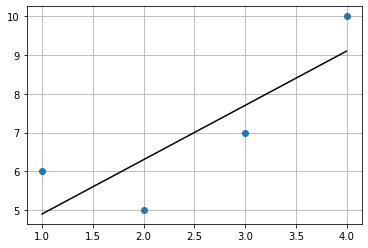

In [113]:
c = poly_fit(x, y, 1)
plot_poly(x, y, c)